### Chemistry Totals

This notebook provides one additional figure demonstrating how many unique batteries we have per chemistry, and which datasource they come from. Since the unique battery id's are not always explicitely stated, we instead provide a hard-coded meta table which mimics the information provided by each data provider in their respective academic publication. This metadata is then plotted to show the unique battery count by chemistry.  

In [1]:
# Build dataframe and plot per-chemistry totals

import pandas as pd
import matplotlib.pyplot as plt

# Input data
data = {
    "NCM":     {"CS2":0, "CX2":0, "Oxford":0, "PL":0, "Finland":3, "MIT":0, "Stanford":6, "ISU":256, "INR":2, "Tongji":0},
    "NCA":     {"CS2":0, "CX2":0, "Oxford":0, "PL":0, "Finland":3, "MIT":0, "Stanford":6, "ISU":0,   "INR":0, "Tongji":66},
    "LFP":     {"CS2":0, "CX2":0, "Oxford":0, "PL":0, "Finland":3, "MIT":124,"Stanford":0, "ISU":0,   "INR":0, "Tongji":0},
    "LCO":     {"CS2":10,"CX2":9,"Oxford":8,"PL":26,"Finland":0,"MIT":0,"Stanford":0,"ISU":0,"INR":0,"Tongji":0},
}

df = pd.DataFrame(data).fillna(0)

# Show the table
df.sample(5)

,NCM,NCA,LFP,LCO
Stanford,6,6,0,0
CS2,0,0,0,10
CX2,0,0,0,9
Tongji,0,66,0,0
INR,2,0,0,0


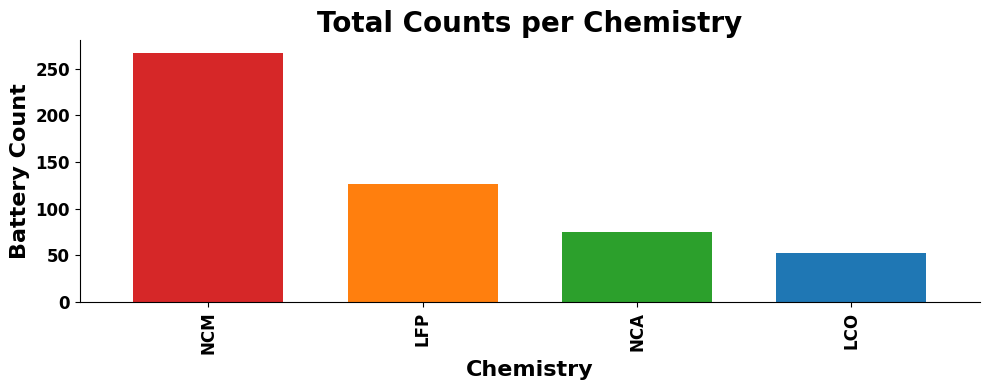

In [2]:
# Sum per chemistry and sort descending
chem_totals = df.sum(axis=0).sort_values(ascending=False)
chem_totals.to_frame(name="total")

# Plot the totals
plt.figure(figsize=(10,4))
# Remove white background
plt.gcf().patch.set_alpha(0)            # transparent figure
ax = plt.gca()
ax.set_facecolor('none')                # transparent axes
plt.rcParams['savefig.facecolor'] = 'none'

# Add some color
chem_palette = {
    "LCO": "#1f77b4",  # blue
    "LFP": "#ff7f0e",  # orange
    "NCA": "#2ca02c",  # green
    "NMC": "#d62728",  # red
}
bar_colors = [chem_palette.get(ch, "#d62728") for ch in chem_totals.index]

chem_totals.plot(kind="bar", color=bar_colors, width=0.7)
plt.title("Total Counts per Chemistry", fontsize=20, fontweight='bold')
plt.ylabel("Battery Count", fontsize=16, fontweight='bold')
plt.xlabel("Chemistry", fontsize=16, fontweight='bold')

# Update ax (reuse the same handle)
ax = plt.gca()
plt.setp(ax.get_xticklabels(), fontsize=12, fontweight='bold')
plt.setp(ax.get_yticklabels(), fontsize=12, fontweight='bold')

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.tight_layout()
plt.show()